# 0) chargement de spark

In [ ]:
from pyspark.sql import SparkSession

#sans se connecter au cluster
#spark = SparkSession.builder.getOrCreate()

spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "2g").\
        getOrCreate() 

# 1) lire de la donnée

## 1.1) lecture brute
Chargez le fichier ville_1.csv dans une variable nommée df.

Vous pouvez afficher votre donnée en utilisant la méthode take() ou la methode collect() de l'objet pyspark DataFrame (attention appeler collect() sur un dataframe est déconseillé si vous avez du vrai big data).

L'objet possède aussi un attribut appelé dtypes, appelez cet attribut pour obtenir la liste des colonnes et leur type.

In [ ]:
path  = "./data_velo/Villes/ville_1.csv"
# lecture d'un fichier de manière la plus brute
df    = spark.read.load(path, format="csv")
df.dtypes

## 1.2) lecture avec les entêtes
Recharger le même fichier mais cette fois-ci utilisez l'option header pour rajouter les noms de colonnes à votre df.

Appelez l'attribut dtypes et comparez la sortie avec celle de la lecture brute.

In [5]:
df = spark.read.format('csv').options(header=True).load(path)
df.dtypes

[('id', 'string'),
 ('vitesse_a_pied', 'string'),
 ('vitesse_a_velo', 'string'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'string'),
 ('casseur', 'string'),
 ('statut', 'string'),
 ('salaire', 'string'),
 ('sexe', 'string'),
 ('age', 'string'),
 ('sportivite', 'string'),
 ('velo_perf_minimale', 'string')]

## 1.3) lecture avec les types détectés automatiquement
Recharger le fichier avec  l'option inferShema.

L'option 'inferSchema' permet de transformer les colonnes en types plus précis : entier  / booléens / chaines de caractères... bien sûr spark trouve les types uniquement si le fichier d'origine permet de les trouver de manière simple

In [4]:
df = spark.read.format('csv').options(header=True, inferSchema=True).load(path)
df.dtypes

[('id', 'int'),
 ('vitesse_a_pied', 'double'),
 ('vitesse_a_velo', 'double'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'boolean'),
 ('casseur', 'boolean'),
 ('statut', 'string'),
 ('salaire', 'double'),
 ('sexe', 'string'),
 ('age', 'int'),
 ('sportivite', 'double'),
 ('velo_perf_minimale', 'double')]

## 1.4) lecture avec schéma
Il vous permet d'afficher le schéma de votre df, avec pour chaque colonne son nom, son type, et si elle accepte les valeurs nulles ou non. 

In [7]:
df.schema

StructType(List(StructField(id,StringType,true),StructField(vitesse_a_pied,StringType,true),StructField(vitesse_a_velo,StringType,true),StructField(home,StringType,true),StructField(travail,StringType,true),StructField(sportif,StringType,true),StructField(casseur,StringType,true),StructField(statut,StringType,true),StructField(salaire,StringType,true),StructField(sexe,StringType,true),StructField(age,StringType,true),StructField(sportivite,StringType,true),StructField(velo_perf_minimale,StringType,true)))

Vous avez aussi la méthode printSchema() qui permet d'afficher le shéma du df de manière plus lisible.

In [8]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- vitesse_a_pied: string (nullable = true)
 |-- vitesse_a_velo: string (nullable = true)
 |-- home: string (nullable = true)
 |-- travail: string (nullable = true)
 |-- sportif: string (nullable = true)
 |-- casseur: string (nullable = true)
 |-- statut: string (nullable = true)
 |-- salaire: string (nullable = true)
 |-- sexe: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sportivite: string (nullable = true)
 |-- velo_perf_minimale: string (nullable = true)



# 2) écriture de la dataframe sur le disque

## 2.1) choix du format : csv

In [9]:
df.write.format("csv").save("./csv")

## 2.2) choix du format : parquet

In [10]:
df.write.format("parquet").save("./parquet")

## 2.3) choix du format : json

In [11]:
df.write.save("./json_data", format="json")

In [12]:
!ls ./data_velo/Villes/

csv  parquet  ville  ville_1.csv


## 2.4) lecture de différents formats
Vous pouvez choisir de lire le df sous un format ou un autre en utilisant l'argument format dans la fonction spark.read.load

In [15]:
spark.read.load("./json_data", format="json")

DataFrame[age: string, casseur: string, home: string, id: string, salaire: string, sexe: string, sportif: string, sportivite: string, statut: string, travail: string, velo_perf_minimale: string, vitesse_a_pied: string, vitesse_a_velo: string]

In [16]:
spark.read.load("./data_velo/Villes/ville/", format="csv").count()

50

# 3) Calculer des résultats : les actions 

## 3.1) nombre de lignes : count
Chargez les fichiers csv contenus dans le dossiers ./data_velo/Cyclistes/ dans un df nommé cyclistes, puis comptez les lignes du dataframe obtenu.

In [23]:
path1  = "./data_velo/Cyclistes/"
df1 = spark.read.format('csv').options(header=True, inferSchema=True).load(path1)
df1.dtypes

[('id', 'int'),
 ('timestamp', 'string'),
 ('sur_velo', 'boolean'),
 ('velo', 'string'),
 ('vitesse', 'double'),
 ('position', 'string'),
 ('destination_finale', 'string')]

In [24]:
spark.read.load("./data_velo/Cyclistes/", format="csv").count()

2232050

Afficher le schéma de ce nouveau df

In [25]:
df1.printSchema

<bound method DataFrame.printSchema of DataFrame[id: int, timestamp: string, sur_velo: boolean, velo: string, vitesse: double, position: string, destination_finale: string]>

Affichez 10 lignes du df.

In [31]:
df1.take(10)

[Row(id=12, timestamp='2018-01-01 00:01:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row(id=12, timestamp='2018-01-01 00:02:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row(id=12, timestamp='2018-01-01 00:03:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row(id=12, timestamp='2018-01-01 00:04:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row(id=12, timestamp='2018-01-01 00:05:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row(id=12, timestamp='2018-01-01 00:06:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False'),
 Row

## 3.2) moyenne : agg + colonne + mean
A l'aide de la méthode agg(), calculez la moyenne sur la colonne vitesse.

Vous pouvez récuperer le résultat avec la méthode collect().

In [34]:
(df1.agg({'vitesse':'avg'})).collect()

[Row(avg(vitesse)=0.4423137464018649)]

## 3.3) quantile approximatifs pour gagner du temps de calcul
En statistiques et en théorie des probabilités, les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données. Il y a donc un quantile de moins que le nombre de groupes créés. Ainsi les quartiles sont les trois quantiles qui divisent un ensemble de données en quatre groupes de taille égale.

La méthode approxQuantile permet de laisser une tolérance a l'erreur ce qui réduit le temps de calul sur d'énormes jeux de données.

In [36]:
import time

In [37]:
def calcul_quantile(df, erreur_acceptee):
    debut            = time.time()
    colonne          = "vitesse"
    quantiles_voulus = [0.25, 0.50, 0.75]
    resultat         =  df.approxQuantile(colonne, quantiles_voulus , erreur_acceptee )
    fin              = time.time()
    delais           = fin -debut
    print ("delais =%.2f sec, quantiles = %s"%(delais, resultat))

In [39]:
calcul_quantile(df1, 0.05)

delais =9.52 sec, quantiles = [0.030000000000000006, 0.2944550644296354, 0.5931162118010243]


In [40]:
calcul_quantile(df1, 0.01)

delais =8.55 sec, quantiles = [0.030000000000000006, 0.2944550644296354, 0.6295531740219638]


In [41]:
calcul_quantile(df1, 0)

delais =31.40 sec, quantiles = [0.030000000000000006, 0.3283952876721612, 0.6295531740219638]


## Reload de la dataframe
Chargez le fichier villes dans un df nommé villes.

In [6]:
villes =spark.read.load("./data_velo/villes/", format="csv", header=True, inferSchema="True")
villes.printSchema()

root
 |-- id: integer (nullable = true)
 |-- vitesse_a_pied: double (nullable = true)
 |-- vitesse_a_velo: double (nullable = true)
 |-- home: string (nullable = true)
 |-- travail: string (nullable = true)
 |-- sportif: boolean (nullable = true)
 |-- casseur: boolean (nullable = true)
 |-- statut: string (nullable = true)
 |-- salaire: double (nullable = true)
 |-- sexe: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sportivite: double (nullable = true)
 |-- velo_perf_minimale: double (nullable = true)



## 3.4) corrélation
En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance.

Calculez la corrélation entre les colonnes age et vitesse_a_velo.

In [54]:
villes.show()

+---+--------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
| id|      vitesse_a_pied|     vitesse_a_velo|               home|            travail|sportif|casseur|              statut|           salaire|sexe|age|         sportivite|velo_perf_minimale|
+---+--------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
|  2|   2.344207322136085|  6.251219525696226|(lon:2.62 lat:2.59)|(lon:2.34 lat:0.97)|  false|  false|               cadre|135167.36710061165|   H| 44|  7.814024407120282|               0.4|
|  3|                0.02|               0.05|(lon:3.79 lat:3.81)|(lon:0.20 lat:0.21)|  false|  false|technicien_de_sur...| 20026.72646423192|   F| 20|                0.1|               0.4|
|  4|                0.02|               0.05

In [60]:
villes.corr('age' ,'vitesse_a_velo')

-0.06411845578664936

## 3.5) covariance
Calculez la covariance entre les colonnes age et vitesse_a_velo.

In [59]:
villes.cov('age' , 'vitesse_a_velo')

-1.5721945755314064

## 3.6) sample

In [7]:
villes_1_pct = villes.sample(False, 0.1)


In [8]:
villes_1_pct.count()

7

In [9]:
villes.exceptAll(villes_1_pct).count()

43

## 3.7) filter 
La méthode filter() permet le df selon certaines valeurs dans les colonnes.

Utilisez cette méthode pour récuperer seulement les lignes avec le sexe féminin.

In [87]:
(villes.filter(villes["sexe"] == "F")).show()

+---+-------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
| id|     vitesse_a_pied|     vitesse_a_velo|               home|            travail|sportif|casseur|              statut|           salaire|sexe|age|         sportivite|velo_perf_minimale|
+---+-------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
|  3|               0.02|               0.05|(lon:3.79 lat:3.81)|(lon:0.20 lat:0.21)|  false|  false|technicien_de_sur...| 20026.72646423192|   F| 20|                0.1|               0.4|
|  4|               0.02|               0.05|(lon:3.39 lat:0.93)|(lon:0.58 lat:0.20)|  false|  false|technicien_de_sur...|15214.584161640825|   F| 35|                0.1|               0.4|
|  6|               0.02|               0.05|(lon:

# 4) Transformer la données : les transformations!

## Transformations : demandent à être suivi par un collect ou une action (count par exemple)

## 4.1) obtenir des statistiques sur les colonnes numériques
La méthode describe() permet de calculer les statistiques récapitulatives d'une ou plusieurs colonnes numériques dans un df. Si le nom des colonnes n'est pas spécifié, la méthode calculera des statistiques récapitulatives pour toutes les colonnes numériques présentes dans le df.

Afficher les statistiques de la colonne age.

In [88]:
villes.describe(["sexe", "age"]).describe().collect()

[Row(summary='count', summary='5', sexe='3', age='5'),
 Row(summary='mean', summary=None, sexe='50.0', age='43.43979797464467'),
 Row(summary='stddev', summary=None, sexe='NaN', age='27.13153036418277'),
 Row(summary='min', summary='count', sexe='50', age='16'),
 Row(summary='max', summary='stddev', sexe='H', age='83')]

## 4.2) groupby
La méthode groupBy() suivie de la methode agg() permet de grouper le df selon les catgories d'une ou plusieurs colonnes pour faire des calculs sur ces catégories.

Calculez la moyenne de la colonnes sportivité selon le sexe des personnes.

In [59]:
villes.groupBy("sexe").agg({'sportivite':'avg'}).collect()

NameError: name 'villes' is not defined

Calculez la moyenne de la colonne age et la valeur max de la colonne sportivité par sexe.

In [10]:
villes.groupBy("sexe").agg({"age" : 'avg',"sportivite": 'max'}).show()

+----+-----------------+------------------+
|sexe|  max(sportivite)|          avg(age)|
+----+-----------------+------------------+
|   F|5.304311048875953|46.095238095238095|
|   H|7.814024407120282| 50.06896551724138|
+----+-----------------+------------------+



Calculez la moyenne des colonnes vitesse_a_pied et vitesse_a_velo par sexe.

In [141]:
(villes.groupBy("sexe")).agg({"vitesse_a_pied"  : 'avg',"vitesse_a_velo" : 'avg'}).show()

+----+-------------------+-------------------+
|sexe|avg(vitesse_a_velo)|avg(vitesse_a_pied)|
+----+-------------------+-------------------+
|   F| 0.9205309567340259|0.36821238269361034|
|   H| 1.3084949404499162| 0.4906856026687184|
+----+-------------------+-------------------+



## 4.3) summary 
La méthode summary() permet des faire des calculs statistiques de base sur toutes les colonnes du df.


In [151]:
villes.summary("count", "max" ).collect()

[Row(summary='count', id='50', vitesse_a_pied='50', vitesse_a_velo='50', home='50', travail='50', statut='50', salaire='50', sexe='50', age='50', sportivite='50', velo_perf_minimale='50'),
 Row(summary='max', id='51', vitesse_a_pied='2.344207322136085', vitesse_a_velo='6.251219525696226', home='(lon:3.90 lat:0.62)', travail='(lon:3.91 lat:3.22)', statut='éboueur', salaire='148702.7189509448', sexe='H', age='83', sportivite='7.814024407120282', velo_perf_minimale='0.4'),
 Row(summary='min', id='2', vitesse_a_pied='0.02', vitesse_a_velo='0.05', home='(lon:0.01 lat:2.24)', travail='(lon:0.20 lat:0.21)', statut='cadre', salaire='9511.945356442959', sexe='F', age='16', sportivite='0.1', velo_perf_minimale='0.4')]

## 4.4) union de dataframe

#### ajouter les colonnes les unes à côté des autres : join

In [153]:
villes.join(villes, on="id").printSchema()

root
 |-- id: integer (nullable = true)
 |-- vitesse_a_pied: double (nullable = true)
 |-- vitesse_a_velo: double (nullable = true)
 |-- home: string (nullable = true)
 |-- travail: string (nullable = true)
 |-- sportif: boolean (nullable = true)
 |-- casseur: boolean (nullable = true)
 |-- statut: string (nullable = true)
 |-- salaire: double (nullable = true)
 |-- sexe: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sportivite: double (nullable = true)
 |-- velo_perf_minimale: double (nullable = true)
 |-- vitesse_a_pied: double (nullable = true)
 |-- vitesse_a_velo: double (nullable = true)
 |-- home: string (nullable = true)
 |-- travail: string (nullable = true)
 |-- sportif: boolean (nullable = true)
 |-- casseur: boolean (nullable = true)
 |-- statut: string (nullable = true)
 |-- salaire: double (nullable = true)
 |-- sexe: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sportivite: double (nullable = true)
 |-- velo_perf_minimale: double (n

#### ajouter les lignes les unes sous les autres : union

In [156]:
villes.unionByName(villes).count()

100

## 4.5) filtre

In [157]:
villes.where(villes.sexe=="F").count()

21

## 4.6) concaténation de colonne : F.concat

In [12]:
from pyspark.sql.types import *
from pyspark.sql       import functions as F

Nous allons ici reprendre le df cyclistes.

Utiliser les méthodes withColumn() et F.concat() pour ajouter une colonne au df qui contiendra la concatenation des valeurs des colonnes id et sur_velo. 

In [14]:
path = "./data_velo/Cyclistes/*.csv" 
tous_les_cyclistes = spark.read.format("csv").option("header", "true").load(path, inferSchema=True)
tous_les_cyclistes.count()
tous_les_cyclistes.withColumn("id_sur_velo", F.concat(tous_les_cyclistes.id,  tous_les_cyclistes.sur_velo)).first()

Row(id=12, timestamp='2018-01-01 00:01:00', sur_velo=False, velo='False', vitesse=0.030000000000000006, position='(lon:2.07 lat:1.24)', destination_finale='False', id_sur_velo='12false')

# 5) udf 
Il est possible d'enregistrer des fonctions python que l'on écrit nous même pour les appliquer sur une colonne d'une dataframe, c'est ce qu'on appelle les udf, pour User Defined Functions

In [161]:
from pyspark.sql.types     import *
from pyspark.sql.functions import udf

@udf(returnType = FloatType())
def cube(colonne):
    return colonne*colonne

In [162]:
villes.select(cube("salaire")).show()

+-------------+
|cube(salaire)|
+-------------+
|1.82702162E10|
|  4.0106976E8|
| 2.31483568E8|
| 3.32549088E8|
|  9.5185338E8|
| 2.96969139E9|
| 1.12880461E9|
| 1.39238304E8|
|  1.0977216E9|
|  2.8854487E9|
|  6.4748621E8|
| 1.22958438E9|
|  5.5217725E9|
| 2.57463706E9|
|  4.4269376E8|
| 2.87179296E8|
| 4.88372224E8|
|  6.9554765E9|
|  6.1511916E9|
|   5.757398E9|
+-------------+
only showing top 20 rows



In [163]:
villes.select(cube(villes.salaire)).show()

+-------------+
|cube(salaire)|
+-------------+
|1.82702162E10|
|  4.0106976E8|
| 2.31483568E8|
| 3.32549088E8|
|  9.5185338E8|
| 2.96969139E9|
| 1.12880461E9|
| 1.39238304E8|
|  1.0977216E9|
|  2.8854487E9|
|  6.4748621E8|
| 1.22958438E9|
|  5.5217725E9|
| 2.57463706E9|
|  4.4269376E8|
| 2.87179296E8|
| 4.88372224E8|
|  6.9554765E9|
|  6.1511916E9|
|   5.757398E9|
+-------------+
only showing top 20 rows



In [164]:
villes.select(cube("salaire")).collect()
#villes.withColumn("salaire",cube("salaire")).collect()

[Row(cube(salaire)=18270216192.0),
 Row(cube(salaire)=401069760.0),
 Row(cube(salaire)=231483568.0),
 Row(cube(salaire)=332549088.0),
 Row(cube(salaire)=951853376.0),
 Row(cube(salaire)=2969691392.0),
 Row(cube(salaire)=1128804608.0),
 Row(cube(salaire)=139238304.0),
 Row(cube(salaire)=1097721600.0),
 Row(cube(salaire)=2885448704.0),
 Row(cube(salaire)=647486208.0),
 Row(cube(salaire)=1229584384.0),
 Row(cube(salaire)=5521772544.0),
 Row(cube(salaire)=2574637056.0),
 Row(cube(salaire)=442693760.0),
 Row(cube(salaire)=287179296.0),
 Row(cube(salaire)=488372224.0),
 Row(cube(salaire)=6955476480.0),
 Row(cube(salaire)=6151191552.0),
 Row(cube(salaire)=5757398016.0),
 Row(cube(salaire)=1513707392.0),
 Row(cube(salaire)=845977152.0),
 Row(cube(salaire)=15607006208.0),
 Row(cube(salaire)=279298720.0),
 Row(cube(salaire)=658956352.0),
 Row(cube(salaire)=332481376.0),
 Row(cube(salaire)=11568824320.0),
 Row(cube(salaire)=871186176.0),
 Row(cube(salaire)=731495360.0),
 Row(cube(salaire)=2211249

# 6)	Etude de cas : analyse des fichiers de logs des cyclistes

In [15]:
from pyspark.sql.types import *
from pyspark.sql       import functions as F
from pyspark.sql.types     import *
from pyspark.sql.functions import udf

## 6.1)  Charger la donnée dans un df nommé cycliste

In [16]:
path3 = "./data_velo/Cyclistes/*.csv" 
cyclistes = spark.read.format("csv").option("header" , "true").load(path3 , inferSchema=True)

## 6.2) vérifier le nombre de cycles

Comptez le nombre d'id uniques.

In [17]:
cyclistes.select("id").distinct().count()

50

## 6.3) transformer les timestamp en date

Voici une fonction qui permert de récuperer la date sous forme de chaîne de caractère dans la colonne timestamps pour la transformer en date exploitable en tant que telle.

Créez une nouvelle colonne dans votre df cycliste stockant le résultat de cette fonction.

In [18]:
from pyspark.sql.types import TimestampType

@udf(returnType = TimestampType())
def transform_timestamp_in_date(timestamp):
    from datetime import datetime
    return datetime.strptime(str(timestamp), "%Y-%m-%d %H:%M:%S")

In [21]:
cyclistes2 = cyclistes.withColumn("date" ,transform_timestamp_in_date(cyclistes['timestamp']))

In [20]:
cyclistes2.show()

+---+-------------------+--------+-----+--------------------+-------------------+------------------+-------------------+
| id|          timestamp|sur_velo| velo|             vitesse|           position|destination_finale|               date|
+---+-------------------+--------+-----+--------------------+-------------------+------------------+-------------------+
| 12|2018-01-01 00:01:00|   false|False|0.030000000000000006|(lon:2.07 lat:1.24)|             False|2018-01-01 00:01:00|
| 12|2018-01-01 00:02:00|   false|False|0.030000000000000006|(lon:2.07 lat:1.24)|             False|2018-01-01 00:02:00|
| 12|2018-01-01 00:03:00|   false|False|0.030000000000000006|(lon:2.07 lat:1.24)|             False|2018-01-01 00:03:00|
| 12|2018-01-01 00:04:00|   false|False|0.030000000000000006|(lon:2.07 lat:1.24)|             False|2018-01-01 00:04:00|
| 12|2018-01-01 00:05:00|   false|False|0.030000000000000006|(lon:2.07 lat:1.24)|             False|2018-01-01 00:05:00|
| 12|2018-01-01 00:06:00|   fals

## vérifier les comptes

In [22]:
from pyspark.sql.types import *
from pyspark.sql       import functions as D
cyclistes2.select(D.countDistinct("id")).show()

+------------------+
|count(DISTINCT id)|
+------------------+
|                50|
+------------------+



## 6.4) Durée des trajets par id.

A partir d'ici, il s'agit de traiter votre donnée pour récupérer la durée de chaque trajet effectué par chaque id.

1) trouvez les dates min/max par état de sur_velo, puis par id ET par état de sur_velo.

In [37]:
cyclistes2.groupBy("sur_velo").agg(F.min(cyclistes2.date), F.max(cyclistes2.date)).show()

+--------+-------------------+-------------------+
|sur_velo|          min(date)|          max(date)|
+--------+-------------------+-------------------+
|    true|2018-01-01 01:47:00|2018-01-31 21:32:00|
|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
+--------+-------------------+-------------------+



In [39]:
(cyclistes2.groupBy("id" , "sur_velo")).agg(F.min(cyclistes2.date), F.max(cyclistes2.date)).show()

+---+--------+-------------------+-------------------+
| id|sur_velo|          min(date)|          max(date)|
+---+--------+-------------------+-------------------+
| 30|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
| 17|    true|2018-01-06 08:33:00|2018-01-28 15:35:00|
|  6|    true|2018-01-01 07:07:00|2018-01-30 20:01:00|
| 48|    true|2018-01-01 02:15:00|2018-01-31 17:57:00|
|  3|    true|2018-01-06 06:24:00|2018-01-28 19:33:00|
| 18|    true|2018-01-06 02:28:00|2018-01-28 16:50:00|
|  7|    true|2018-01-01 06:33:00|2018-01-31 18:43:00|
| 25|    true|2018-01-01 11:27:00|2018-01-30 11:30:00|
| 42|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
| 41|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
| 29|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
| 11|    true|2018-01-01 07:48:00|2018-01-31 14:05:00|
|  9|    true|2018-01-06 06:54:00|2018-01-28 14:03:00|
| 36|    true|2018-01-01 08:47:00|2018-01-31 21:32:00|
|  6|   false|2018-01-01 00:01:00|2018-02-01 00:00:00|
| 23|   fa

## 6.5) détecter les changements d'états "sur un vélo" ou pas : window et lag
2) Le résultat n'est pas trés pertinent, il faudrait plutôt le début et la fin de chaque trajet par id. Pour cela, il faudrait détecter les changements d'états "sur_vélo".
Utilisez la classe Window() et la fonction F.lag() pour créer une nouvelle colonne que vous appellerez changement, contenant un 0 si l'état précedent de sur_velo est le même et un 1 si l'état vient de changer (fonction changement() ci-dessous) pour chaque id.

In [40]:
from pyspark.sql.functions import udf

In [41]:
@udf(returnType = IntegerType())
def changement(etat_actuel, etat_precedent):
    """
    Détecte si les deux états sont différent.
    
    Parametres :
        etat_actuel : valeur sur la ligne courante
                      renvoyée par F.lag (0) 
        etat_precedent : valeur sur la ligne précédente
                      renvoyée par F.lag(1)
    Return: 0 s'ils sont égaux, 1 s'il y a une différence
    """
    if etat_precedent == None:
        return 0
    if etat_precedent == etat_actuel:
        return 0
    if etat_actuel != etat_precedent:
        return 1

In [42]:
from pyspark.sql.window import Window
w = Window.orderBy(["id", "date"])

In [49]:
cyclistes3 = cyclistes2.withColumn("changement" ,changement(F.lag("sur_velo" ,0  sur_velo(F.lag(1))))

TypeError: Invalid argument, not a string or column: 0 of type <class 'int'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

collecter les données d'un id et verifier sa position lors des changements d'etats

## 6.6) somme partielle par sous groupe : windows
Grâce à la fonction window appliquez la fonction somme() sur la colonne changement pour numeroter les trajets pour chaque id et stocker les résulats dans une nouvelle colonne appelée numero_de_trajet.


[windows fonctions](https://www.quantmetry.com/blog/window-functions-spark/)


In [ ]:
@udf(returnType = IntegerType())
def somme(indice_actuel, indice_precedent):
    if indice_precedent == None:
        return 0
6.6) somme partielle par sous groupe : windows
Grâce à la fonction window appliquez la fonction somme() sur la colonne changement pour numeroter les trajets pour chaque id et stocker les résulats dans une nouvelle colonne appelée numero_de_trajet.

windows fonctions

1
@udf(returnType = IntegerType())
2
def somme(indice_actuel, indice_precedent):
3
    if indice_precedent == None:
4
        return 0
5
    return indice_actuel + indice_precedent
1●
​    return indice_actuel + indice_precedent

## 6.7) Calculer la durée du trajet

Il suffit maintenant de repêter la première étape, c'est a dire récupérer la début et la fin de chaque trajet pour chaque id. Puis calculer la durée des trajets.

# 7) datavisualisation
Convertissez votre dataframe pyspark en dataframe pandas.

A l'aide de la librairie seaborn, réalisez un graphique en barre montrant la durée de tout les trajets.

Faire le même graphique mais cette fois-ci, faire en sorte qu'on puisse choisir un id et afficher seulement les trajets de cet id.

Sauvegardez votre dataset trajets au format csv dans le dossier data.

In [1]:

from pyspark.sql import SparkSession
spark1 = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "2g").\
        getOrCreate() 
path1 = 'hdfs://namenode:9000/bases/carbu.csv'
path2 = 'hdfs://namenode:9000/bases/loyer.csv'
path3 = 'hdfs://namenode:9000/bases/presi.csv'
path4 = 'hdfs://namenode:9000/bases/ecoles.csv'
path5 = 'hdfs://namenode:9000/bases/loc.csv'
df = spark1.read.format('csv').options(header=True).load(path2)
df.show()

22/11/16 14:06:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


+-----------+-------------+---------------------+---------------+
|Observatory|agglomeration|moyenne_loyer_mensuel|surface_moyenne|
+-----------+-------------+---------------------+---------------+
|      B0600|         Nice|                  738|             57|
|      B0600|         Nice|                 null|           null|
|      B0600|         Nice|                 1089|             98|
|      B0600|         Nice|                 null|           null|
|      B0600|         Nice|                  493|             29|
|      B0600|         Nice|                  655|             46|
|      B0600|         Nice|                  840|             69|
|      B0600|         Nice|                 1022|             92|
|      B0600|         Nice|                  493|             29|
|      B0600|         Nice|                  652|             46|
|      B0600|         Nice|                  844|             69|
|      B0600|         Nice|                  741|             54|
|      B06

In [2]:

df1 = spark1.read.format('csv').options(header=True).load(path1)
df2 = spark1.read.format('csv').options(header=True).load(path2)
df3 = spark1.read.format('csv').options(header=True).load(path3)
df4 = spark1.read.format('csv').options(header=True).load(path4)
df5 = spark1.read.format('csv').options(header=True).load(path5)
df1.show()

+--------+-----+--------------------+-----------+--------+--------+--------------------+--------+--------------------+--------+--------------------+
|      id|   cp|               ville|prix_valeur|prix_nom|dep_code|            dep_name|reg_code|            reg_name|com_code|            com_name|
+--------+-----+--------------------+-----------+--------+--------+--------------------+--------+--------------------+--------+--------------------+
|54300001|54300|Moncel-lès-Lunéville|      1.717|     E10|      54|  Meurthe-et-Moselle|      44|           Grand Est|   54373|Moncel-lès-Lunéville|
|77260008|77260|La Ferté-sous-Jou...|      2.134|  Gazole|      77|      Seine-et-Marne|      11|       Île-de-France|   77478|      Ussy-sur-Marne|
|63230001|63230|         LA GOUTELLE|      1.751|  Gazole|      63|         Puy-de-Dôme|      84|Auvergne-Rhône-Alpes|   63170|         La Goutelle|
|72800003|72800|             LE LUDE|      1.758|  Gazole|      72|              Sarthe|      52|    Pays 

In [4]:
from pyspark.sql.types import *
from pyspark.sql       import functions as D
dfEc = df4.groupBy('libelle_commune').agg(D.count(df4.numero_uai).alias('NbreEcole'))
dfEc.show()

+--------------------+---------+
|      libelle_region|NbreEcole|
+--------------------+---------+
|    Pays de la Loire|     3692|
|Bourgogne-Franche...|     3369|
| Centre-Val de Loire|     2703|
|Auvergne-Rhône-Alpes|     7904|
|           Grand Est|     5655|
|              Guyane|      273|
|          Martinique|      376|
|TOM et Collectivi...|      758|
|     Hauts-de-France|     6355|
|  Nouvelle-Aquitaine|     6266|
|               Corse|      329|
|          Guadeloupe|      417|
|           Occitanie|     5963|
|             Mayotte|      273|
|            Bretagne|     3078|
|           Normandie|     3353|
|       Ile-de-France|     9489|
|          La Réunion|      753|
|Provence-Alpes-Cô...|     4144|
+--------------------+---------+



In [22]:
dfCar = df1.groupBy('prix_nom', 'reg_name').agg(D.avg(df1.prix_valeur)).show()

+--------+--------------------+------------------+
|prix_nom|            reg_name|  avg(prix_valeur)|
+--------+--------------------+------------------+
|     E10|     Hauts-de-France|1.6312228360957637|
|    null|    Pays de la Loire|              null|
|     E85|  Nouvelle-Aquitaine|0.8160032258064519|
|     E10|Auvergne-Rhône-Alpes|1.6168676056338016|
|    GPLc|           Grand Est| 0.789674796747967|
|    SP98|           Normandie|1.7502562500000003|
|    SP98|            Bretagne|1.7341771300448459|
|     E85|Provence-Alpes-Cô...|0.7938698884758365|
|  Gazole|Provence-Alpes-Cô...|1.8847744458930904|
|     E85|     Hauts-de-France|0.8012479338842983|
|     E85|           Occitanie|0.7992165775401066|
|    GPLc|           Normandie|0.7460285714285716|
|     E85|            Bretagne|0.8155542857142861|
|     E10|Provence-Alpes-Cô...|1.5901642743221682|
|  Gazole|           Normandie|1.9108457249070612|
|    null|Bourgogne-Franche...|              null|
|    null| Centre-Val de Loire|

In [24]:
dfCar = df1.groupBy('prix_nom', 'reg_name').agg(D.avg(df1.prix_valeur)).show()

+--------+--------------------+----------------+
|prix_nom|            reg_name|max(prix_valeur)|
+--------+--------------------+----------------+
|     E10|     Hauts-de-France|           2.049|
|    null|    Pays de la Loire|            null|
|     E85|  Nouvelle-Aquitaine|           1.811|
|     E10|Auvergne-Rhône-Alpes|           2.059|
|    GPLc|           Grand Est|           1.149|
|    SP98|           Normandie|           2.095|
|    SP98|            Bretagne|            2.73|
|     E85|Provence-Alpes-Cô...|           1.625|
|  Gazole|Provence-Alpes-Cô...|             2.4|
|     E85|     Hauts-de-France|           1.861|
|     E85|           Occitanie|           1.739|
|    GPLc|           Normandie|           0.997|
|     E85|            Bretagne|           1.985|
|     E10|Provence-Alpes-Cô...|           2.379|
|  Gazole|           Normandie|            2.27|
|    null|Bourgogne-Franche...|            null|
|    null| Centre-Val de Loire|            null|
|  Gazole|          

In [13]:
 LocEco = df2.join(df4, df2.agglomeration == df4.libelle_commune , 'inner')
LocEco.first()

Row(Observatory='B0600', agglomeration='Nice', moyenne_loyer_mensuel='777', surface_moyenne='56', numero_uai='0060048V', code_postal_uai='6200', libelle_commune='Nice', code_departement='6', code_region='93', libelle_departement='Alpes-Maritimes', libelle_region="Provence-Alpes-Côte d'Azur", libelle_academie='Nice', date_ouverture='5/1/1965')

In [16]:
LocCar = df2.join(df1, df2.agglomeration == df1.ville , 'inner')
LocCar.show()

+-----------+-------------+---------------------+---------------+--------+-----+--------+-----------+--------+--------+--------+--------+--------------------+--------+--------+
|Observatory|agglomeration|moyenne_loyer_mensuel|surface_moyenne|      id|   cp|   ville|prix_valeur|prix_nom|dep_code|dep_name|reg_code|            reg_name|com_code|com_name|
+-----------+-------------+---------------------+---------------+--------+-----+--------+-----------+--------+--------+--------+--------+--------------------+--------+--------+
|      B3800|     Grenoble|                  705|             64|38100003|38100|Grenoble|      1.779|     E10|      38|   Isère|      84|Auvergne-Rhône-Alpes|   38185|Grenoble|
|      B3800|     Grenoble|                  651|             57|38100003|38100|Grenoble|      1.779|     E10|      38|   Isère|      84|Auvergne-Rhône-Alpes|   38185|Grenoble|
|      B3800|     Grenoble|                  884|             87|38100003|38100|Grenoble|      1.779|     E10|     

In [23]:
temp = df2.withColumn("prix_m2",(df2.moyenne_loyer_mensuel/df2.surface_moyenne))
prix_m2 = temp.groupBy("agglomeration").agg(D.avg(temp.prix_m2).alias('locm2'))
prix_m2.show()

+--------------------+------------------+
|       agglomeration|             locm2|
+--------------------+------------------+
|    Pays de Challans| 8.290620043482633|
|Agglomération d'A...| 8.914890079408494|
|Sud Loire - proch...| 7.075522689611067|
|Teste-de-Buch-Arc...|10.388780300464141|
|    La Roche-sur-Yon| 7.931202262569315|
|                Nice|13.708420636404384|
|         Montpellier|11.582946078189531|
|              Toulon|11.159646346671856|
|            Grenoble|10.563314296753283|
|               Lille|10.896751570225993|
|    Clermont-Ferrand|  8.60140410157928|
|              Nantes|10.518386291726392|
|           Marseille|11.933605169520643|
|          Draguignan| 9.826129102555557|
|               Paris|  20.7089925991274|
|Eurométropole de ...| 9.955287414353323|
|                Lyon|11.390500853450707|
|Unité urbaine de ...|10.934787196437995|
|Agglomération d'A...|11.933605169520643|
|Agglomération d'A...|  7.65010831564793|
+--------------------+------------

In [24]:
import pandas as pds
locPN = prix_m2.toPandas()

In [25]:
print(locPN)

                     agglomeration      locm2
0                 Pays de Challans   8.290620
1            Agglomération d'Arles   8.914890
2   Sud Loire - proche Haute-Loire   7.075523
3           Teste-de-Buch-Arcachon  10.388780
4                 La Roche-sur-Yon   7.931202
5                             Nice  13.708421
6                      Montpellier  11.582946
7                           Toulon  11.159646
8                         Grenoble  10.563314
9                            Lille  10.896752
10                Clermont-Ferrand   8.601404
11                          Nantes  10.518386
12                       Marseille  11.933605
13                      Draguignan   9.826129
14                           Paris  20.708993
15     Eurométropole de Strasbourg   9.955287
16                            Lyon  11.390501
17      Unité urbaine de l'Bayonne  10.934787
18   Agglomération d'Aix-Marseille  11.933605
19         Agglomération d'Alençon   7.650108
20                        Bordeaux

In [9]:
pip install pyspark #need spark 3.3 


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: xlabel='agglomeration', ylabel='locm2'>

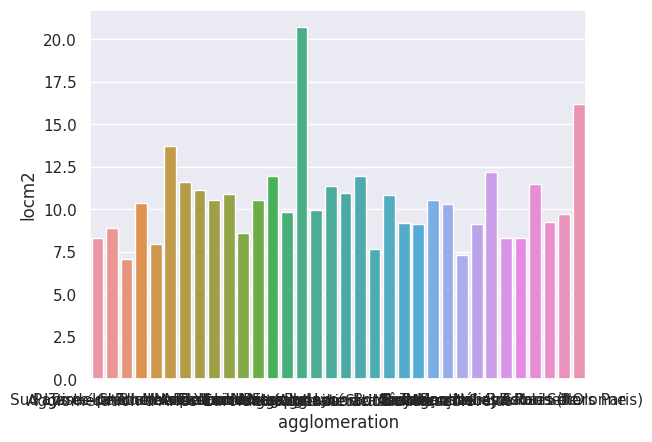

In [30]:
import seaborn as sns
sns.set_theme()
sns.barplot(
    data = locPN,
    y="locm2",
    x="agglomeration",
)

In [59]:
c=str(input("entrer la 1ére ville"))
locVille=locPN[locPN['agglomeration'] == c]
if((locPN.filter('locVille')).empty()):
    "Ville pas en base"
else:
    sns.barplot(x = 'agglomeration',
            y = 'locm2',
            data = locVille)


entrer la 1ére ville Nice


TypeError: 'bool' object is not callable